Вспомогательные функции, библиотеки

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

# Лабораторная работа 2
*Сыромятников Дмитрий (КН-401)*

Вариант $13$

# Задача 1
Методом моментов по выборке объема $n=100$ определите неизвестный параметр $\lambda$ экспоненциального (показательного) распределения

|  Xi  | ni |
|------|----|
| 57   | 65 |
| 168  | 24 |
| 278  | 5  |
| 389  | 4  |
| 500  | 1  |
| 611  | 1  |

Так как требуется определить один параметр $\lambda$, то достаточно одного соотношения, связывающего теоретический и эмпирический момент

## Расчет первого начального выборочного момента $\hat{\nu}_1$

В условии уже дан дискретный вариационный ряд выборки *dfd*

In [35]:
dfd = [
    (57, 65),
    (168, 24),
    (278, 5),
    (389, 4),
    (500, 1),
    (611, 1)
]

Первый начальный выборочный момент $\hat{\nu}_1$ (*[sm_1](https://en.wikipedia.org/wiki/Method_of_moments_(statistics))*) равен

$$
\nu_1 = \sum_i x_i^1 \cdot \hat{p}_i = \frac{1}{n} \sum_i x_i^1 \cdot n_i
$$

Вычислим его.
Объем выборки $n$

In [36]:
n = sum(frequency for _, frequency in dfd)

Соответввенно *sm_1*

In [37]:
sm_1 = (1 / n) * sum(x_i * n_i for x_i, n_i in dfd)

## Выражение первого начального теоретического момента $\nu_1$

Первый начальный теоретический момент (математическое ожидание) $\nu_1$ известен и равен

$$
\nu_1 = \frac{1}{\lambda}
$$

## Метод моментов

Для вычисления параметра $\lambda$ воспользуемся методом моментов, приравняв найденные начальные теоретический и эмпирический (выборочный) первые выборочные моменты и решив получившееся уравнение относительно $\lambda$:

$\mu_1 = \hat{\nu}_1$

$\frac{1}{\lambda} = \hat{\nu}_1$

$$
\lambda = \frac{1}{\hat{\nu}_1}
$$

Полученное значение $\lambda$ (*l*):

In [38]:
l = 1 / sm_1

In [39]:
print(l)

0.008478887569950822


## Построение графиков

Для каждого варианта дискретного вариационного ряда найдем шаг (*H*) интервала по формулам:

$$
h_i =
\begin{cases}
h_{i+1} & i = 1 \\
x_{i-1} - x_i & i > 1 
\end{cases}
$$

In [40]:
H = [0] * len(dfd)
for i in range(1, len(dfd)):
    H[i] = dfd[i][0] - dfd[i-1][0]
H[0] = H[1]

Построим дискретный вариационный ряд с частостями (*rel_dfd*) на основе дискретного ряда с частотами (*dfd*)

In [41]:
rel_dfd = [(x_i, n_i / n) for x_i, n_i in dfd]

Вычислим данные для построения аналога плотности вероятности (*pdf*), поделив элементы ряда rel_dfd (частости) на соответствующие шаги *H*

In [42]:
pdf = [(rel_dfd[0], rel_dfd[1] / h_i) for rel_dfd, h_i in zip(rel_dfd, H)]

variants = [variant for variant, _ in pdf]
densitys = [density for _, density in pdf]

Вычислим данные для построения графика теоретической плотности вероятности с найденным параметром $\lambda$ (в 500 точках на всем диапозоне выборки). Формула плотности

$$
f(x;\lambda) = 
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

In [43]:
theoretical_x = np.linspace(dfd[0][0], max(variants), 500)
theoretical_y = l * np.exp(-l * theoretical_x)
theoretical_vals = [l * np.exp(-l * x) for x in variants]

Построим графики плотности вероятности (теоретический и практической) по найденным данным

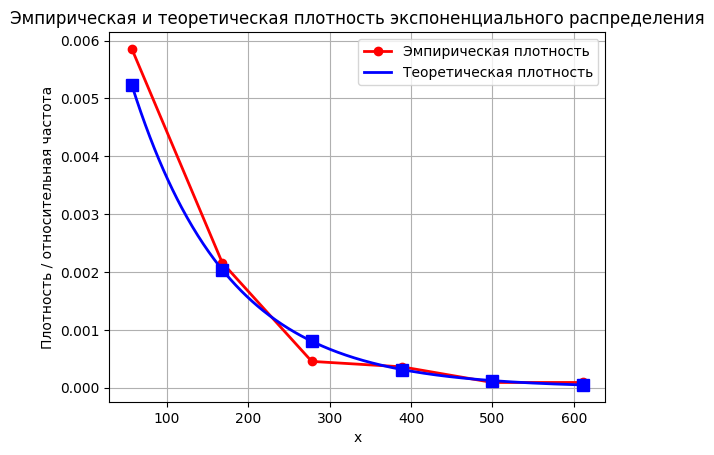

In [44]:
plt.plot(variants, densitys, "ro-", lw=2, label="Эмпирическая плотность")
plt.plot(theoretical_x, theoretical_y, "b-", lw=2, label="Теоретическая плотность")
plt.plot(variants, theoretical_vals, "bs", ms=8)

plt.xlabel("x")
plt.ylabel("Плотность / относительная частота")
plt.title("Эмпирическая и теоретическая плотность экспоненциального распределения")
plt.legend()
plt.grid(True)
plt.show()

# Задача 2

Методом моментов по выборке объема $n=100$ определите параметры $a$ и $b$ равномерного распределения


| x    | y   |
| ---- | --- |
| 5,8  | 17  |
| 7,5  | 17  |
| 9,2  | 18  |
| 10,8 | 13  |
| 12,5 | 16  |
| 14,2 | 19  |

Так как требуется определить 2 параметра, то достаточно 2 соотношений моментов, связывающих теоретические и эмпирические моменты

## Расчет первого начального выборочного момента $\hat{\nu}_1$

В условии уже дан дискретный вариационный ряд выборки *dfd* c объемом выборки *n*

In [45]:
dfd = [
    (5.8, 17),
    (7.5, 17),
    (9.2, 18),
    (10.8, 13),
    (12.5, 16),
    (14.2, 19)
]

In [46]:
n = sum(frequency for _, frequency in dfd)

Формула для $\hat{\nu_1}$ (*sm_1*) выписана выше


In [47]:
sm_1 = (1 / n) * sum(x_i * n_i for x_i, n_i in dfd)

## Расчет второго начального выборочного момента $\hat{\nu}_2$

Второй начальный выборочный момент $\hat{\nu}_2$ (*[sm_2](https://en.wikipedia.org/wiki/Method_of_moments_(statistics))*) равен

$$
\nu_2 = \sum_i x_i^2 \cdot \hat{p}_i = \frac{1}{n} \sum_i x_i^2 \cdot n_i
$$

Вычислим его.

In [48]:
sm_2 = (1 / n) * sum(x_i**2 * n_i for x_i, n_i in dfd)

## Выражение первого начального теоретического момента $\nu_1$

Для равномерного распределения первый начальный теоретический момент $\nu_1$ известен и равен

$$
\nu_1 = \frac{a + b}{2}
$$

## Выражение второго начального теоретического момента $\nu_2$

Для равномерного распределения второй начальный теоретический момент $\nu_2$ [известен](https://en.wikipedia.org/w/index.php?title=Continuous_uniform_distribution&spm=a2ty_o01.29997173.0.0.740dc921LvKptH#Moments) и равен

$$
\nu_2 = \frac{b^3 - a^3}{3(b-a)}
$$

## Метод моментов

Для вычисления параметров $a$ и $b$ воспользуемся методом моментов, приравняв найденные начальные теоретические и эмпирическии (выборочные)  и решив получившуюся систему уравнений относительно параметров:

$$
\begin{cases}
v_1 = \hat{v}_1 \\
v_2 = \hat{v}_2
\end{cases}
$$

$$
\begin{cases}
\frac{a + b}{2} = \hat{v}_1 \\
\frac{b^3 - a^3}{3(b-a)} = \hat{v}_2
\end{cases}
$$

Решив полученную систему, получим значения параметров:

$a = \hat{v}_1 - \sqrt{3(\hat{v}_2 - \hat{v}_1^2)}$

$b = \hat{v}_1 + \sqrt{3(\hat{v}_2 - \hat{v}_1^2)}$

In [49]:
a = sm_1 - (3 * (sm_2 - sm_1**2))**0.5
b = sm_1 + (3 * (sm_2 - sm_1**2))**0.5

In [50]:
print(a)
print(b)

4.936400566639157
15.101599433360843


## Построение графиков

По аналогии с задачей 1

Рассчитаем шаги *H* для каждого варианта выборки

In [51]:
H = [0] * len(dfd)
for i in range(1, len(dfd)):
    H[i] = dfd[i][0] - dfd[i-1][0]
H[0] = H[1]

Рассчитаем относительные частоты (частости)

In [52]:
rel_dfd = [(x_i, n_i / n) for x_i, n_i in dfd]

Рассчитаем данные для эмпирической плотности вероятности

In [53]:
pdf = [(x_i, rel_freq / h_i) for (x_i, rel_freq), h_i in zip(rel_dfd, H)]

Вычислим теоретическую плотность вероятности по формуле

$$
f(x;a,b) = 
\begin{cases}
\frac{1}{b - a}, & x \in [a,b] \\
0, & x \notin [a,b]
\end{cases}
$$

In [54]:
theoretical_density = 1 / (b - a)

Построим графики плотностей (теоретической и эмпирической) по найденным данным

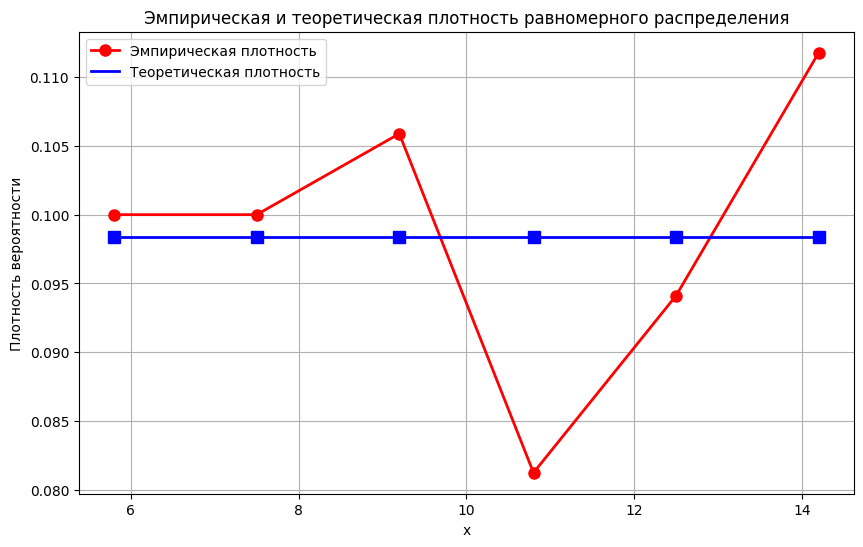

In [55]:
empirical_x = [x for x, _ in pdf]
empirical_y = [density for _, density in pdf]

theoretical_x = np.linspace(min(x_i for x_i, _ in dfd), max(x_i for x_i, _ in dfd), 500)
theoretical_y = np.full_like(theoretical_x, theoretical_density)

plt.figure(figsize=(10, 6))
plt.plot(empirical_x, empirical_y, "ro-", lw=2, label="Эмпирическая плотность", markersize=8)
plt.plot(theoretical_x, theoretical_y, "b-", lw=2, label=f"Теоретическая плотность")

theoretical_vals_at_points = [theoretical_density] * len(empirical_x)
plt.plot(empirical_x, theoretical_vals_at_points, "bs", ms=8)

plt.xlabel("x")
plt.ylabel("Плотность вероятности")
plt.title("Эмпирическая и теоретическая плотность равномерного распределения")
plt.legend()
plt.grid(True)
plt.show()

# Задача 3

Методом максимального правдоподобия по выборке объема $n$ определите параметр $\beta$ гамма-распределения. Параметр $\alpha=2,31$

| x   | n   |
|-----|-----|
| 14  | 32  |
| 41  | 20  |
| 64  | 20  |
| 86  | 15  |
| 108 | 8   |
| 130 | 5   |

В условии уже дан дискретный вариационный ряд выборки *dfd* c объемом выборки *n*

In [56]:
dfd = [
    (14, 32),
    (41, 20),
    (64, 20),
    (86, 15),
    (108, 8),
    (130, 5)
]

параметр $\alpha$ (alpha)

In [57]:
alpha = 2.31

## Плотность вероятности гамма распределения

Плотность вероятности гамма-распределения с параметрами $\alpha, \beta$ высчитывается по формуле

$$
f(x) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}, \quad x > 0
$$

где $\Gamma$ - [Гама-функция](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

Число элементов выборки $n=100$

In [58]:
n = sum(frequency for _, frequency in dfd)

Число вариантов выборки $k = 6$

## Фукция правдоподобия

Составим функцию правдоподобия $L$ по выборке и распределению. От одной переменной, потому что прочие ее аргументы фиксированы

$$
L(\beta) = \prod_{i=1}^{k} [f(x_i)]^{n_i}
$$


### Логарифмирование функции правдоподобия

Логарифмируем $L$ для простоты дальнейших вычислений. Воспользуемся свойствами логарифмов (вынесение степени, сумма логарифмов)

$$
\ell(\beta) = \sum_{i=1}^{k} n_i \ln f(x_i)
$$

### Подставление заданной плотности вероятности

Подставив в $\ell$ функцию плотности гамма распределения $f$, воспользуемся свойствами логарифма выше + логарифм частного + логарифм аргумента, равного основанию

$$
\ell(\beta) = \sum_{i=1}^{6} n_i \left[ \alpha \ln \beta - \ln \Gamma(\alpha) + (\alpha - 1) \ln x_i - \beta x_i \right]
$$

### Разбитие $\ell$ на суммы

Раскроем сумму, используя свойства сумм (вынесение константы, сумма сумм)

$$
\ell(\beta) = \alpha \ln \beta \cdot \sum_{i=1}^{6} n_i - \ln \Gamma(\alpha)  \sum_{i=1}^{6} n_i + (\alpha - 1) \sum_{i=1}^{6} n_i \ln x_i - \beta \sum_{i=1}^{6} n_i x_i
$$

Упростим (сумма частот дает объем выборки)

$$
\ell(\beta) = \alpha n \ln \beta - n \ln \Gamma(\alpha) + (\alpha - 1) \sum_{i=1}^{6} n_i \ln x_i - \beta \sum_{i=1}^{6} n_i x_i
$$


## Поиск точки максимума функции правдоподобия

Доказывали, что точки экстремума исходной функции правдоподобия $L$ и $\ell$ совпадают. Найдем точки экстремума $ell$

### Дифференцирование $\ell$ по $\beta$

Продифференцируем $\ell(\beta)$ по $\beta$
$$
\frac{d\ell}{d\beta} = \frac{\alpha n}{\beta} - \sum_{i=1}^{k} n_i x_i
$$

### Приравнивание производной $\ell$ к 0, поиск точек экстремума функции

Приравняем $\frac{d\ell}{d\beta}$ к 0, решим полученное уравнение относительно $\beta$

$$
\frac{\alpha n}{\beta} - \sum_{i=1}^{k} n_i x_i = 0
$$

Отсюда получаем предполагаемую оценку методом максимального правдоподобия для $\beta$

$$
\hat{\beta} = \frac{\alpha n}{\sum_{i=1}^{k} n_i x_i}
$$

### Проверка, что найденная точка экстремума производной $\ell$ - максимум

Проверим, что найденная оценка - максимум $\ell \to L \to$ является оценкой искомого параметра методом максимального приближения.

Для этого вычислим знак 2 производной по $\beta$ функции $\ell$ в найденной точке экстремума $\hat{\beta}$

$$
\frac{d^2 \ell}{d \beta^2} = \frac{d}{d \beta} \left( \frac{\alpha n}{\beta} - \sum n_i x_i \right) = -\frac{\alpha n}{\beta^2}
$$

и увидим, что она явно отрицательна в точке $\hat{\beta}$ ($\beta$ возводится в квадрат, $\alpha$ положительная, перед дробью минус)

## Упрощение выражения. Вывод формулы оценки

Упростив полученную формулу для $\hat{\beta}$ (появилось выборочное среднее), получаем оценку, полученную методом:

$$
\hat{\beta} = \frac{\alpha}{\bar{x}}
$$

## Построение графиков

### Эмпирические данные

По аналогии с задачей 1

Рассчитаем шаги *H* для каждого варианта выборки

In [59]:
H = [0] * len(dfd)
for i in range(1, len(dfd)):
    H[i] = dfd[i][0] - dfd[i-1][0]
H[0] = H[1]

Рассчитаем относительные частоты (частости)

In [60]:
rel_dfd = [(x_i, n_i / n) for x_i, n_i in dfd]

Рассчитаем данные для эмпирической плотности вероятности

In [61]:
pdf = [(x_i, rel_freq / h_i) for (x_i, rel_freq), h_i in zip(rel_dfd, H)]

variants = [x for x, _ in pdf]
densitys = [density for _, density in pdf]

### Теоретические данные
Вычислим выборочное среднее для вычисления оценки $\hat{\beta}$

In [62]:
mean = (1 / n) * sum(x_i * n_i for x_i, n_i in dfd)

Вычислим $\beta$ по найденной формуле

In [63]:
beta = alpha / mean

Вычислим теоретическую плотность вероятности по формуле плотности гамма-распределения, записанной выше


In [64]:
theoretical_x = np.linspace(min(variants), max(variants), 500)
theoretical_y = [(beta**alpha / gamma(alpha)) * (x**(alpha-1)) * np.exp(-beta * x) for x in theoretical_x]
theoretical_vals = [(beta**alpha / gamma(alpha)) * (x**(alpha-1)) * np.exp(-beta * x) for x in variants]

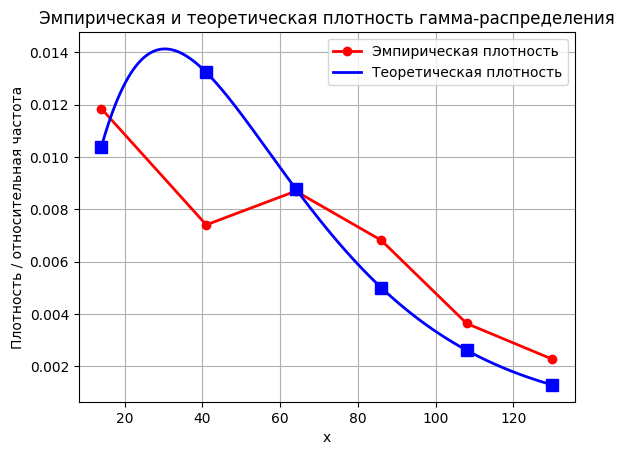

In [65]:
plt.plot(variants, densitys, "ro-", lw=2, label="Эмпирическая плотность")
plt.plot(theoretical_x, theoretical_y, "b-", lw=2, label="Теоретическая плотность")
plt.plot(variants, theoretical_vals, "bs", ms=8)

plt.xlabel("x")
plt.ylabel("Плотность / относительная частота")
plt.title("Эмпирическая и теоретическая плотность гамма-распределения")
plt.legend()
plt.grid(True)
plt.show()

In [66]:
%whos

Variable                     Type       Data/Info
-------------------------------------------------
H                            list       n=6
a                            float      4.936400566639157
alpha                        float      2.31
b                            float      15.101599433360843
beta                         float      0.043161434977578475
densitys                     list       n=6
dfd                          list       n=6
empirical_x                  list       n=6
empirical_y                  list       n=6
gamma                        ufunc      <ufunc 'gamma'>
i                            int        5
l                            float      0.008478887569950822
mean                         float      53.52
n                            int        100
np                           module     <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pdf                          list       n=6
plt                          module     <module 'matplotlib.pyplo<..